# World Cities Hierarchical Clustering

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Uploading the datasets**

In [2]:
df1cty = pd.read_csv('DS2_C6_S3_Cities_Data_Challenge.csv')

In [3]:
df2wcty = pd.read_csv('DS2_C6_S3_WorldCities_Data_Challenge.csv')

In [4]:
df3cost = pd.read_csv('DS2_C6_S3_MoveHubCostOfLiving_Data_Challenge.csv')

In [5]:
df4qual = pd.read_csv('DS2_C6_S3_MoveHubQualityOfLife_Data_Challenge.csv')

In [6]:
df1cty

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan
...,...,...
3538,Austin,United States
3539,Avellaneda,Argentina
3540,Avignon,France
3541,Ayacucho,Peru


In [7]:
df2wcty

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [8]:
df3cost

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55
...,...,...,...,...,...,...,...
211,Davao,0.79,1.90,3.17,0.84,554.18,158.34
212,Karachi,1.00,3.27,5.11,0.67,197.78,139.60
213,Lahore,1.23,3.27,6.54,0.66,206.08,132.95
214,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22


In [9]:
df4qual

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86
...,...,...,...,...,...,...,...
211,Dusseldorf,83.45,72.52,75.98,8.61,88.02,15.34
212,Tokyo,80.00,47.57,71.53,30.54,69.29,13.91
213,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86
214,Marbella,81.96,60.14,83.64,32.27,75.24,9.11


In [10]:
# renaming col
df2wcty = df2wcty.rename(columns={'city': 'City'})


In [11]:
df2wcty

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
26564,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,Sermersooq,NaN,10.0,1304217709
26565,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
26566,Cheremoshna,Cheremoshna,51.3894,30.0989,Ukraine,UA,UKR,Kyyivs’ka Oblast’,NaN,0.0,1804043438
26567,Ambarchik,Ambarchik,69.6510,162.3336,Russia,RU,RUS,Sakha (Yakutiya),NaN,0.0,1643739159


In [12]:
# sorting values
df2wcty = df2wcty.sort_values(by='population', ascending=False)

In [13]:
# dropping duplicates

In [14]:
df2wcty.drop_duplicates(subset=['City'],keep='first',inplace=True)

In [15]:
df2wcty['City'].duplicated().sum()

0

In [16]:
# dropping null

In [17]:
df2wcty.dropna()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,3.797700e+07,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,3.454000e+07,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,2.961700e+07,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,2.335500e+07,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,2.308800e+07,1608618140
...,...,...,...,...,...,...,...,...,...,...,...
8289,Ciudad Guzmán,Ciudad Guzman,19.7000,-103.4667,Mexico,MX,MEX,Jalisco,minor,9.700000e+01,1484316056
9075,Qubadlı,Qubadli,39.3439,46.5797,Azerbaijan,AZ,AZE,Qubadlı,admin,7.300000e+01,1031526251
26073,Hödrögö,Hodrogo,48.9664,96.7833,Mongolia,MN,MNG,Dzavhan,minor,1.000000e+01,1496403046
9343,Gaigirgordub,Gaigirgordub,9.5500,-78.9667,Panama,PA,PAN,Kuna Yala,admin,1.000000e+01,1591425685


In [18]:
# merging all data frames

In [19]:
df1_2 = pd.merge(df1cty, df2wcty, on='City',how='inner')

In [20]:
df1_2_3 = pd.merge(df1_2, df3cost,  on='City',how='inner')

In [21]:
main_df = pd.merge(df1_2_3, df4qual, on='City',how='inner')

In [22]:
main_df.isnull().sum()

City                      0
Country                   0
city_ascii                0
lat                       0
lng                       0
country                   0
iso2                      0
iso3                      0
admin_name                1
capital                  49
population                0
id                        0
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
dtype: int64

In [23]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   189 non-null    object 
 1   Country                189 non-null    object 
 2   city_ascii             189 non-null    object 
 3   lat                    189 non-null    float64
 4   lng                    189 non-null    float64
 5   country                189 non-null    object 
 6   iso2                   189 non-null    object 
 7   iso3                   189 non-null    object 
 8   admin_name             188 non-null    object 
 9   capital                140 non-null    object 
 10  population             189 non-null    float64
 11  id                     189 non-null    int64  
 12  Cappuccino             189 non-null    float64
 13  Cinema                 189 non-null    float64
 14  Wine                   189 non-null    float64
 15  Gasoli

In [24]:
main_df.drop('capital',axis=1,inplace=True)

In [25]:
main_df

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Orlando,United States,Orlando,28.4772,-81.3369,United States,US,USA,Florida,1822394.0,...,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07
1,Oslo,Norway,Oslo,59.9111,10.7528,Norway,NO,NOR,Oslo,693494.0,...,12.32,1.57,2016.66,2800.92,82.09,52.51,88.19,29.39,71.27,35.53
2,Ottawa,Canada,Ottawa,45.4247,-75.6950,Canada,CA,CAN,Ontario,989567.0,...,9.56,0.80,1020.02,2900.68,87.69,91.85,66.02,33.55,86.11,22.25
3,Oxford,United Kingdom,Oxford,51.7519,-1.2578,United Kingdom,GB,GBR,Oxfordshire,154600.0,...,7.97,1.36,1494.67,1693.96,80.94,50.33,66.20,11.48,72.09,24.22
4,Quito,Ecuador,Quito,-0.2186,-78.5097,Ecuador,EC,ECU,Pichincha,2011388.0,...,6.54,0.29,310.54,196.13,67.15,14.24,32.41,14.76,46.43,48.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Athens,Greece,Athens,37.9794,23.7161,Greece,GR,GRC,Attikí,664046.0,...,5.97,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49
185,Athens,United States,Athens,37.9794,23.7161,Greece,GR,GRC,Attikí,664046.0,...,5.97,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49
186,Atlanta,United States,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,5449398.0,...,6.53,0.61,1046.03,2288.19,84.92,80.83,61.11,63.09,80.51,56.04
187,Auckland,New Zealand,Auckland,-36.8500,174.7833,New Zealand,NZ,NZL,Auckland,1467800.0,...,8.27,1.18,1432.98,2149.47,86.43,49.02,71.85,30.03,66.98,50.38


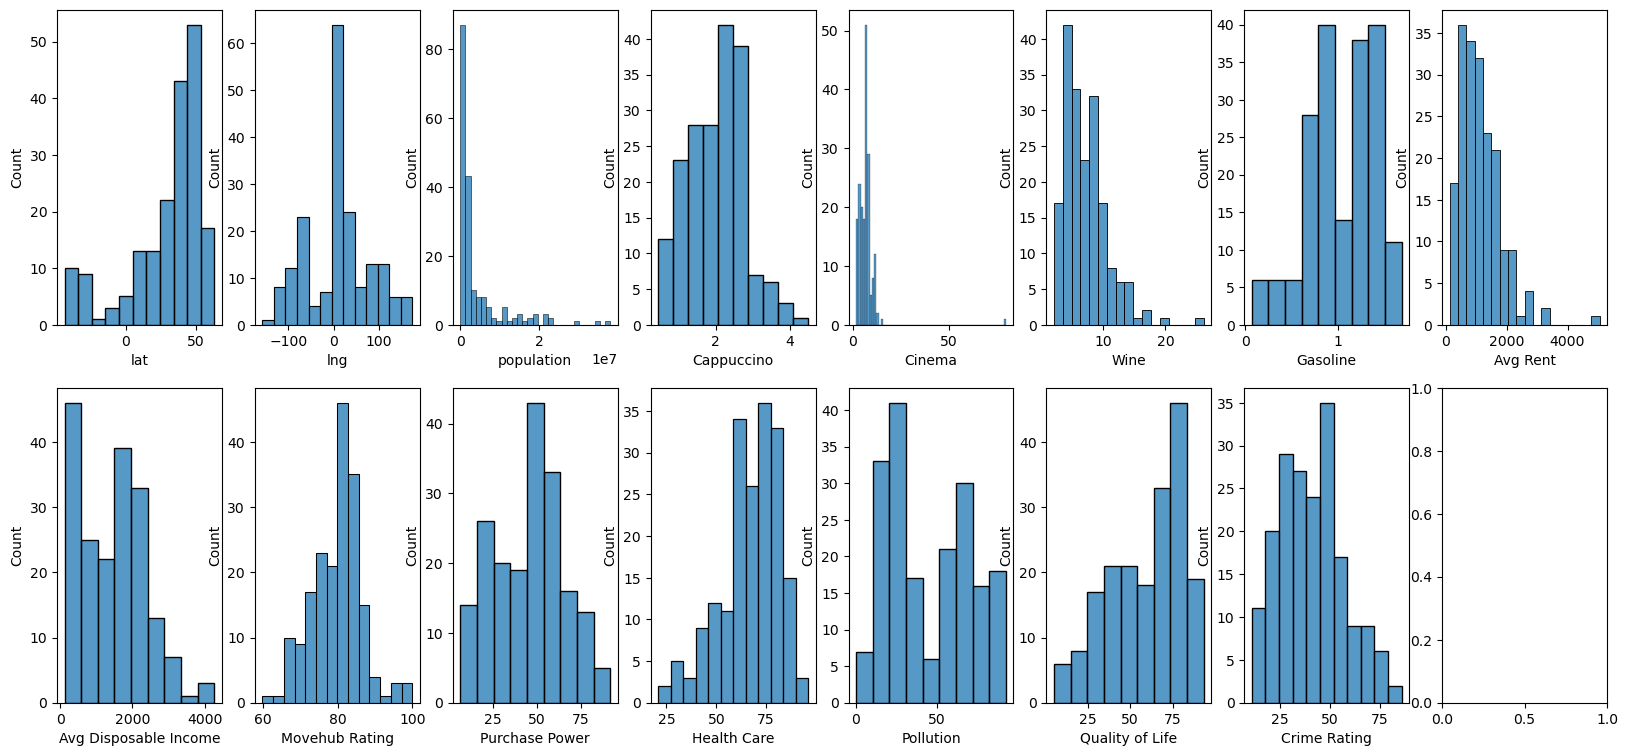

In [26]:
num_col = main_df.select_dtypes(["float64"])

fig,axs=plt.subplots(2,8,figsize=(20,9))
axs=axs.ravel()

count=0
for i in num_col:
    sns.histplot(x=i,data=main_df,ax=axs[count])
    count+=1

<AxesSubplot:xlabel='population'>

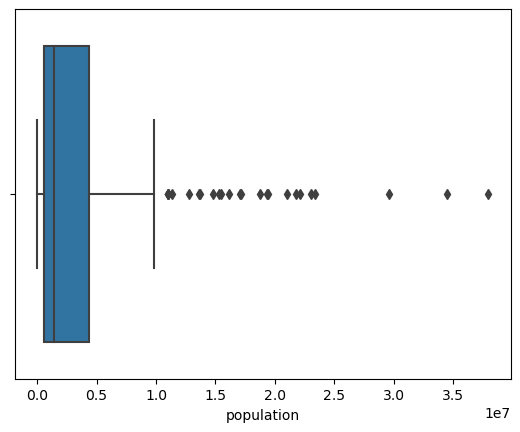

In [27]:
sns.boxplot('population',data=main_df)

In [28]:
iqr=main_df['population'].quantile(0.75)-main_df['population'].quantile(0.25)
lf=main_df['population'].quantile(0.25)-1.5*iqr
uf=main_df['population'].quantile(0.75)+1.5*iqr
main_df=main_df[(main_df['population']>lf) & (main_df['population']<uf)]  

<AxesSubplot:xlabel='population'>

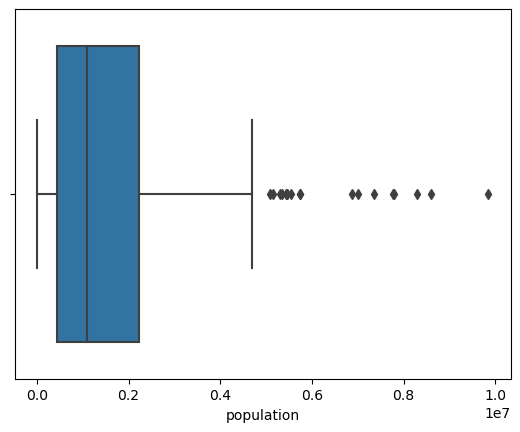

In [29]:
sns.boxplot('population',data=main_df)

In [30]:
corr_mat = main_df.corr()

<AxesSubplot:>

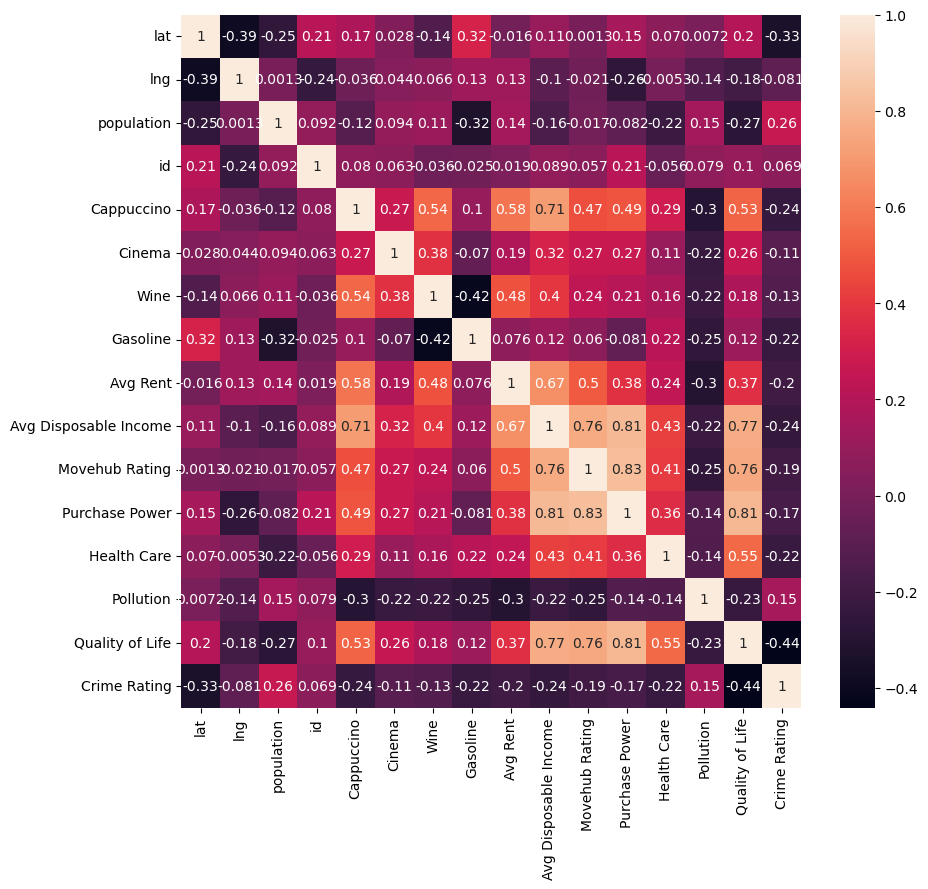

In [31]:
plt.figure(figsize=(10,9))
sns.heatmap(corr_mat,annot=True)

In [32]:
main2_df = main_df.copy()

In [33]:
# normalizing

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [35]:
cat_col = ['City','Country','city_ascii','country','iso2','iso3','admin_name']
main_df[cat_col] = main_df[cat_col].astype('category')

In [36]:
label_encoder =preprocessing.LabelEncoder()

for col in cat_col:
    main_df[col] = label_encoder.fit_transform(main_df[col])

In [37]:
main_df

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,109,64,109,28.4772,-81.3369,62,61,62,40,1822394.0,...,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07
1,110,39,110,59.9111,10.7528,38,42,42,95,693494.0,...,12.32,1.57,2016.66,2800.92,82.09,52.51,88.19,29.39,71.27,35.53
2,111,10,111,45.4247,-75.6950,10,11,11,94,989567.0,...,9.56,0.80,1020.02,2900.68,87.69,91.85,66.02,33.55,86.11,22.25
3,112,63,112,51.7519,-1.2578,61,24,24,96,154600.0,...,7.97,1.36,1494.67,1693.96,80.94,50.33,66.20,11.48,72.09,24.22
4,119,18,119,-0.2186,-78.5097,17,19,19,99,2011388.0,...,6.54,0.29,310.54,196.13,67.15,14.24,32.41,14.76,46.43,48.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,9,23,9,37.9794,23.7161,22,25,25,7,664046.0,...,5.97,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49
185,9,64,9,37.9794,23.7161,22,25,25,7,664046.0,...,5.97,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49
186,10,64,10,33.7627,-84.4224,62,61,62,44,5449398.0,...,6.53,0.61,1046.03,2288.19,84.92,80.83,61.11,63.09,80.51,56.04
187,11,38,11,-36.8500,174.7833,37,43,43,8,1467800.0,...,8.27,1.18,1432.98,2149.47,86.43,49.02,71.85,30.03,66.98,50.38


In [38]:
corr_mat1 = main_df.corr()

<AxesSubplot:>

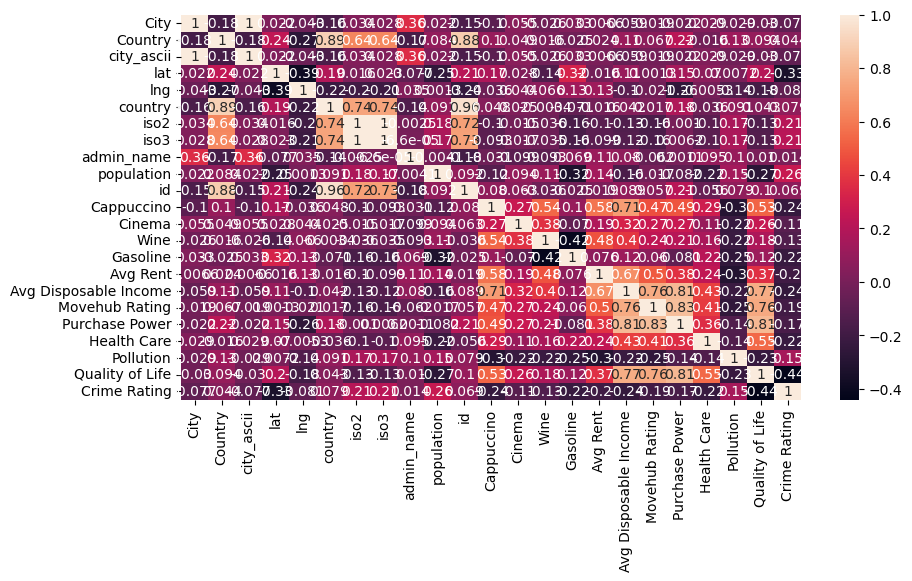

In [39]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_mat1,annot=True)

In [40]:
main_df.describe()

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,1.640000e+02,...,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,75.847561,37.024390,75.847561,30.983765,3.645685,35.152439,31.310976,31.378049,69.432927,1.833400e+06,...,6.944756,1.057195,1108.873902,1513.906890,80.050915,47.958598,67.259573,43.564573,63.061585,39.857866
std,45.276600,21.908049,45.276600,27.417147,68.224565,21.251516,19.792658,20.006220,40.941097,2.005243e+06,...,3.192139,0.352425,642.178221,885.820992,6.131087,19.612829,14.392482,25.558686,20.114371,15.500536
min,0.000000,0.000000,0.000000,-43.530900,-157.846000,0.000000,0.000000,0.000000,0.000000,8.335000e+03,...,2.130000,0.070000,120.680000,120.680000,59.880000,6.380000,20.830000,0.000000,5.290000,10.860000
25%,35.750000,19.750000,35.750000,22.616700,-49.761425,16.750000,14.000000,14.000000,31.750000,4.326570e+05,...,4.260000,0.817500,647.535000,681.990000,76.352500,32.660000,59.720000,22.342500,47.487500,27.437500
50%,74.500000,37.500000,74.500000,41.685300,6.795550,36.000000,27.500000,27.500000,71.500000,1.083452e+06,...,6.245000,1.160000,996.765000,1601.700000,81.325000,49.610000,69.850000,33.950000,69.450000,38.250000
75%,115.250000,62.000000,115.250000,50.176150,30.411425,58.250000,47.250000,47.250000,103.000000,2.217651e+06,...,8.290000,1.360000,1375.247500,2092.720000,84.020000,61.152500,77.912500,66.620000,79.642500,48.457500
max,153.000000,67.000000,153.000000,63.440000,174.783300,65.000000,65.000000,65.000000,139.000000,9.848000e+06,...,19.610000,1.680000,5052.310000,4266.110000,98.440000,91.850000,91.900000,92.420000,93.050000,85.700000


In [41]:
#scaled the data except lat, lng and id

In [42]:
scale_df=pd.DataFrame(StandardScaler().fit_transform(main_df),columns=main_df.columns)
scale_df.drop(['lat','lng','id'],axis=True,inplace=True)
scale_df['lat']=main_df['lat']
scale_df['lng']=main_df['lng']
scale_df['id']=main_df['id']
scale_df

,City,Country,city_ascii,country,iso2,iso3,admin_name,population,Cappuccino,Cinema,...,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,lat,lng,id
0,0.734463,1.235082,0.734463,1.267194,1.504596,1.535310,-0.721111,-0.005506,-0.074383,-0.212278,...,0.565841,0.709886,1.181991,0.609848,1.066905,0.960877,0.984400,28.4772,-81.3369,1.840015e+09
1,0.756617,0.090454,0.756617,0.134404,0.541704,0.532559,0.626397,-0.570204,1.825323,0.643820,...,1.457354,0.333600,0.232773,1.458715,-0.556288,0.409337,-0.280063,59.9111,10.7528,1.578325e+09
2,0.778771,-1.237315,0.778771,-1.187185,-1.029330,-1.021705,0.601897,-0.422102,0.509098,0.072552,...,1.570318,1.249776,2.244747,-0.086390,-0.393027,1.149378,-1.139431,45.4247,-75.6950,1.124399e+09
3,0.800925,1.189297,0.800925,1.219994,-0.370509,-0.369917,0.650897,-0.839770,0.644791,0.124046,...,0.203884,0.145457,0.121281,-0.073845,-1.259174,0.450229,-1.011950,51.7519,-1.2578,1.826690e+09
4,0.956004,-0.871034,0.956004,-0.856788,-0.623902,-0.620605,0.724398,0.089033,-1.078514,-0.685385,...,-1.492190,-2.110625,-1.724477,-2.428790,-1.130449,-0.829383,0.550186,-0.2186,-78.5097,1.218442e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,-1.480948,-0.642108,-1.480948,-0.620790,-0.319831,-0.319780,-1.529616,-0.584935,1.309689,-0.061013,...,-0.942024,-0.535131,-1.120476,-1.473988,-0.632817,-1.620289,1.141002,53.4000,-2.9833,1.826559e+09
160,-1.480948,1.235082,-1.480948,-0.620790,-0.319831,-0.319780,-1.529616,-0.584935,1.309689,-0.061013,...,-0.942024,-0.535131,-1.120476,-1.473988,-0.632817,-1.620289,1.141002,46.0500,14.5167,1.705917e+09
161,-1.458794,1.235082,-1.458794,1.267194,1.504596,1.535310,-0.623110,1.808795,0.264850,-0.133427,...,0.876762,0.796596,1.681149,-0.428585,0.766285,0.870117,1.047170,NaN,NaN,NaN
162,-1.436640,0.044668,-1.436640,0.087204,0.592383,0.582696,-1.505116,-0.182881,0.251281,0.260829,...,0.719682,1.043636,0.054284,0.319923,-0.531171,0.195403,0.680903,NaN,NaN,NaN


In [43]:
scale_df.drop(columns=['lat','lng','id'],inplace=True)

**Creating Dendogram for 2 features**

In [44]:
x=scale_df.iloc[:,[7,17]].values

In [45]:
x

array([[-5.50563652e-03,  1.06690501e+00],
       [-5.70204168e-01, -5.56287870e-01],
       [-4.22102486e-01, -3.93026690e-01],
       [-8.39769807e-01, -1.25917434e+00],
       [ 8.90329711e-02, -1.13044918e+00],
       [ 7.16678206e-01,  4.79007784e-01],
       [-8.38332174e-01, -1.04018459e+00],
       [ 4.35991672e-01, -1.70971241e+00],
       [-4.81903305e-01, -7.05420678e-01],
       [ 1.62311064e+00, -5.21359396e-01],
       [-2.41025292e-01, -8.42779844e-01],
       [ 9.36409992e-02,  9.15417476e-01],
       [-2.57259437e-01, -4.64845911e-01],
       [-1.81025885e-01, -1.90173047e-02],
       [-2.06086415e-01,  8.27507610e-01],
       [-8.09503486e-01,  1.58965475e+00],
       [ 2.52491103e+00, -1.25917434e+00],
       [ 5.19928614e-01, -9.31082165e-01],
       [-4.14382588e-01, -9.10674517e-01],
       [ 1.76004190e+00,  1.35064980e+00],
       [ 2.58793877e+00,  1.91735448e+00],
       [ 3.74378055e-01, -9.80139009e-01],
       [ 9.78337866e-01, -4.18536249e-01],
       [ 1.

In [46]:
from scipy.cluster.hierarchy import dendrogram,linkage

Text(0, 0.5, 'Euclidean distance')

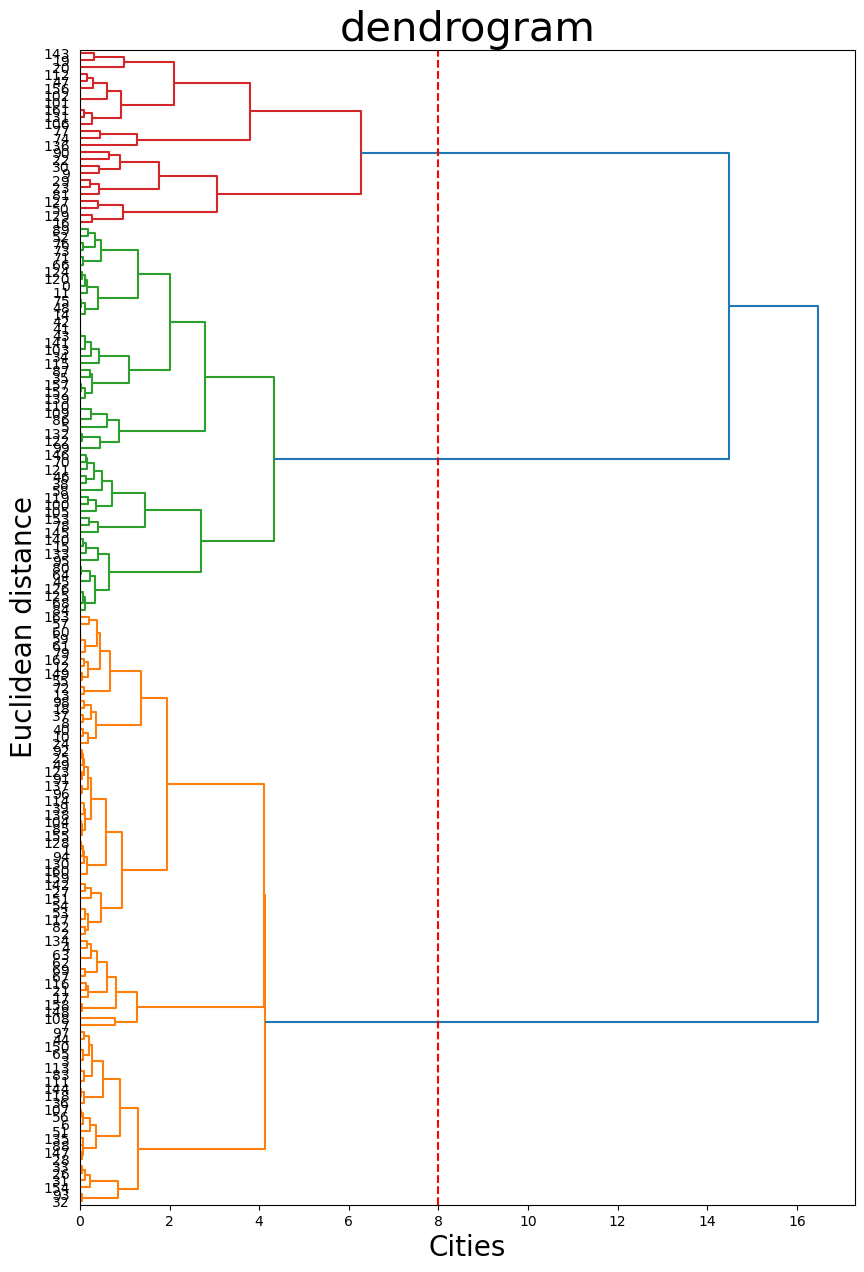

In [47]:
plt.figure(figsize=(10,15))
dendrogram = dendrogram(linkage(x,method='ward',metric='euclidean'),labels=scale_df.index,orientation='right')
plt.axvline(x=8.0,color='r',linestyle ='--')
ax=plt.gca()
ax.tick_params(axis='y',which='major',labelsize=10)
plt.title('dendrogram',fontsize=30)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Euclidean distance',fontsize=20)

**Model building using Agglo**

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
hc = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [50]:
y_hc = hc.fit_predict(x)

In [51]:
y_hc

array([2, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2,
       1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2,
       2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 0, 2, 1, 1, 1, 0, 1, 1], dtype=int64)

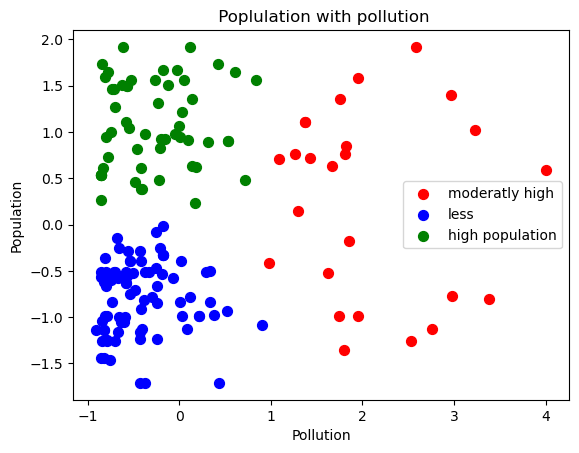

In [52]:
plt.scatter(x[y_hc == 0,0],x[y_hc ==0,1],s=50,c='red',label='moderatly high')
plt.scatter(x[y_hc == 1,0],x[y_hc ==1,1],s=50,c='blue',label='less')
plt.scatter(x[y_hc == 2,0],x[y_hc ==2,1],s=50,c='green',label='high population')
#plt.scatter(x[y_hc == 3,0],x[y_hc ==3,1],s=50,c='cyan',label='high price no sale')
#plt.scatter(x[y_hc == 4,0],x[y_hc ==4,1],s=50,c='magenta',label='sensible')
plt.title(' Poplulation with pollution')
plt.ylabel('Population')
plt.xlabel('Pollution')
plt.legend()
plt.show()

In [53]:
# 

In [54]:
# dend=sch.dendrogram(sch.linkage(df,method='complete'),labels=df.index,orientation='right')
# plt.axvline(x=2.8,color='r',linestyle='--')
# ax=plt.gca()
# ax.tick_params(axis='y',which='major',labelsize=10)

In [55]:
# whole data

In [56]:
from scipy.cluster.hierarchy import dendrogram,linkage

Text(0, 0.5, 'Euclidean distance')

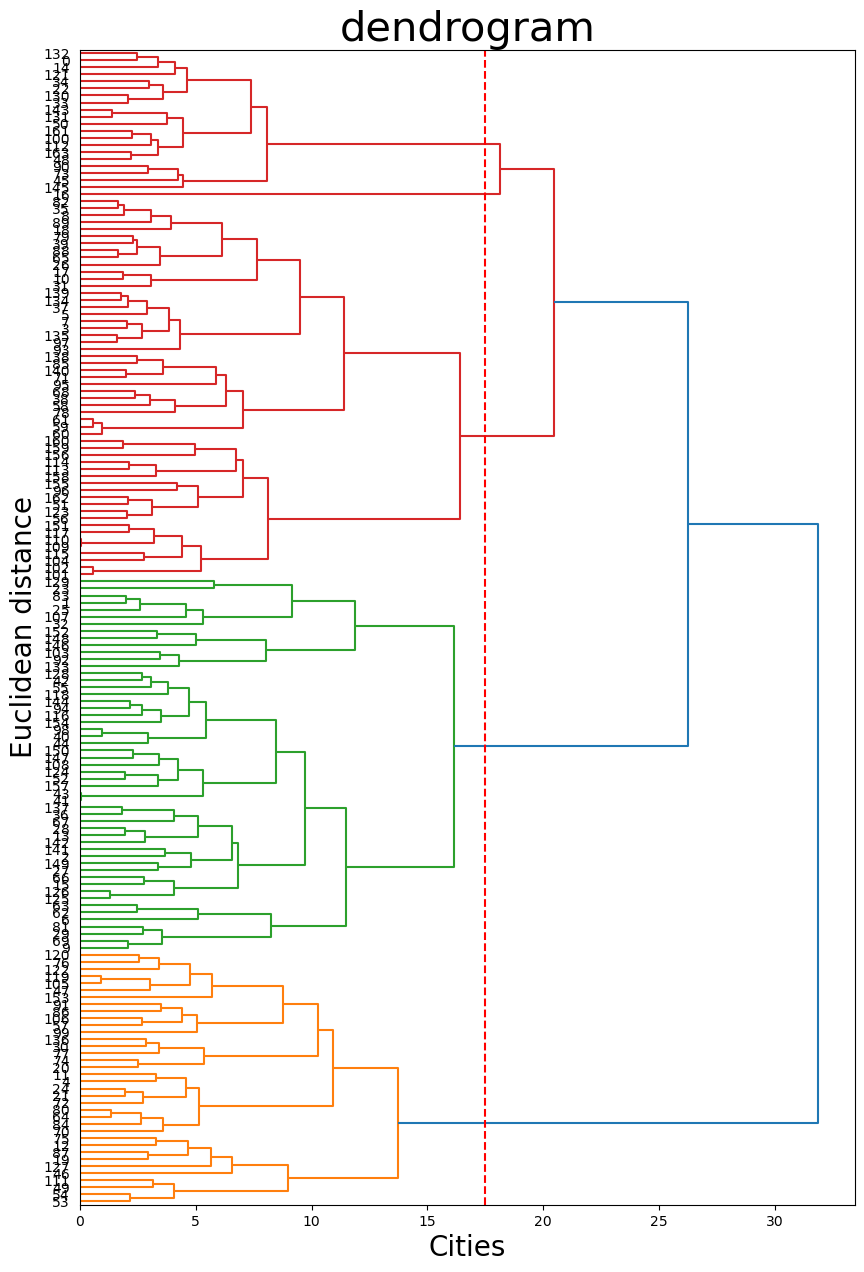

In [57]:
plt.figure(figsize=(10,15))
dendrogram = dendrogram(linkage(scale_df,method='ward',metric='euclidean'),labels=scale_df.index,orientation='right')
plt.axvline(x=17.5,color='r',linestyle ='--')
ax=plt.gca()
ax.tick_params(axis='y',which='major',labelsize=10)
plt.title('dendrogram',fontsize=30)
plt.xlabel('Cities',fontsize=20)
plt.ylabel('Euclidean distance',fontsize=20)

In [58]:
# berlin_df = main_df.iloc[main_df['City'] == 'Berlin', :]

In [59]:
# berlin_df

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
hcw = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [62]:
y_hcw = hcw.fit_predict(scale_df)

In [63]:
y_hcw

array([3, 2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 3, 2, 4, 0, 0, 1, 1, 1,
       3, 2, 1, 2, 0, 2, 2, 2, 1, 0, 2, 3, 3, 0, 2, 0, 0, 0, 2, 2, 2, 2,
       2, 3, 1, 1, 3, 1, 3, 0, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0,
       2, 2, 0, 2, 1, 0, 1, 3, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1,
       0, 0, 3, 1, 2, 0, 2, 0, 0, 0, 2, 1, 3, 0, 0, 2, 0, 1, 1, 2, 2, 0,
       0, 1, 3, 0, 0, 0, 2, 0, 2, 1, 1, 3, 1, 0, 2, 2, 2, 1, 2, 2, 3, 3,
       3, 2, 0, 0, 1, 2, 0, 0, 0, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 0, 0, 2, 0, 0, 0, 3, 0, 3], dtype=int64)

In [64]:
scale_df['y_hcw']=y_hcw

In [65]:
# sns.pairplot(scale_df)

In [66]:
main2_df['cluster']=y_hcw

In [67]:
main2_df

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,...,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,cluster
0,Orlando,United States,Orlando,28.4772,-81.3369,United States,US,USA,Florida,1822394.0,...,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07,3
1,Oslo,Norway,Oslo,59.9111,10.7528,Norway,NO,NOR,Oslo,693494.0,...,1.57,2016.66,2800.92,82.09,52.51,88.19,29.39,71.27,35.53,2
2,Ottawa,Canada,Ottawa,45.4247,-75.6950,Canada,CA,CAN,Ontario,989567.0,...,0.80,1020.02,2900.68,87.69,91.85,66.02,33.55,86.11,22.25,2
3,Oxford,United Kingdom,Oxford,51.7519,-1.2578,United Kingdom,GB,GBR,Oxfordshire,154600.0,...,1.36,1494.67,1693.96,80.94,50.33,66.20,11.48,72.09,24.22,0
4,Quito,Ecuador,Quito,-0.2186,-78.5097,Ecuador,EC,ECU,Pichincha,2011388.0,...,0.29,310.54,196.13,67.15,14.24,32.41,14.76,46.43,48.36,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,Athens,Greece,Athens,37.9794,23.7161,Greece,GR,GRC,Attikí,664046.0,...,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49,0
185,Athens,United States,Athens,37.9794,23.7161,Greece,GR,GRC,Attikí,664046.0,...,1.45,468.87,681.99,76.78,26.05,46.11,27.44,30.57,57.49,0
186,Atlanta,United States,Atlanta,33.7627,-84.4224,United States,US,USA,Georgia,5449398.0,...,0.61,1046.03,2288.19,84.92,80.83,61.11,63.09,80.51,56.04,3
187,Auckland,New Zealand,Auckland,-36.8500,174.7833,New Zealand,NZ,NZL,Auckland,1467800.0,...,1.18,1432.98,2149.47,86.43,49.02,71.85,30.03,66.98,50.38,0


In [68]:
# main2_df['City'][main2_df['cluster']==0].value_counts()

In [69]:
a=main2_df[main2_df['City']=='Berlin']

In [70]:
a   # cluster 2

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,...,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,cluster
125,Berlin,Germany,Berlin,52.5167,13.3833,Germany,DE,DEU,Berlin,3644826.0,...,1.36,916.42,1772.57,89.54,68.72,65.48,16.05,91.17,24.18,2


In [71]:
b=main2_df[main2_df['City']=='Madrid']

In [72]:
b   # cluster 0

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,...,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,cluster
5,Madrid,Spain,Madrid,40.4189,-3.6919,Spain,ES,ESP,Madrid,3266126.0,...,1.24,1193.48,1278.72,85.37,54.07,73.51,55.77,59.87,39.34,0


In [73]:
c=main2_df[main2_df['City']=='Liverpool']

In [74]:
c  # cluster 0 

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,population,...,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,cluster
159,Liverpool,United Kingdom,Liverpool,53.4,-2.9833,United Kingdom,GB,GBR,Liverpool,864122.0,...,1.35,896.8,1534.47,81.23,53.78,82.86,55.35,83.14,28.7,0


In [78]:
main2_df['cluster'].value_counts()

0    54
2    53
1    36
3    20
4     1
Name: cluster, dtype: int64

In [76]:
# based on the findings city London is similar to Madrid 
# they belong in the same cluster

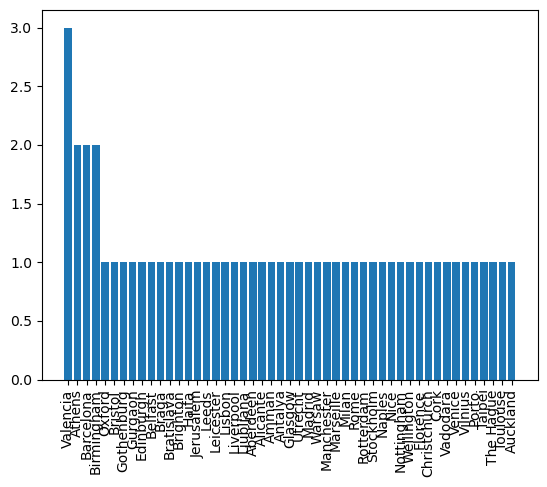

<Figure size 2000x1500 with 0 Axes>

In [86]:
clust0 = main2_df[main2_df['cluster']==0]
plt.bar(clust0['City'].value_counts().index,clust0['City'].value_counts())
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))
plt.show()

In [84]:
# cities belong to the first cluster

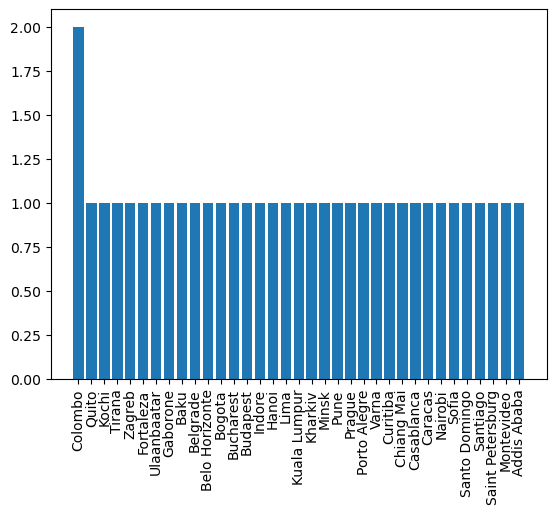

<Figure size 2000x1500 with 0 Axes>

In [85]:
clust1 = main2_df[main2_df['cluster']==1]
plt.bar(clust1['City'].value_counts().index,clust1['City'].value_counts())
plt.xticks(rotation=90)
plt.figure(figsize=(20,15))
plt.show()

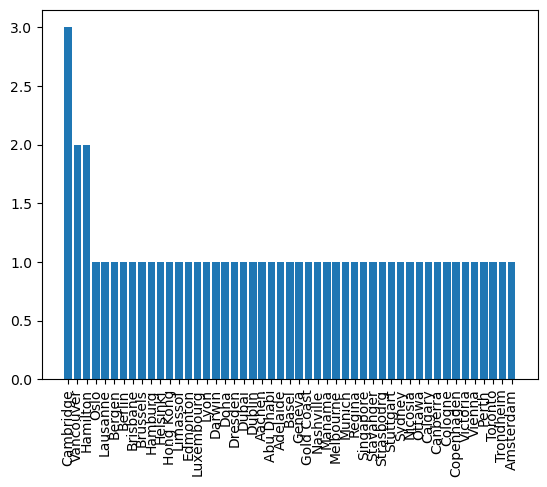

<Figure size 3000x900 with 0 Axes>

In [87]:
clust2 = main2_df[main2_df['cluster']==2]
plt.bar(clust2['City'].value_counts().index,clust2['City'].value_counts())
plt.xticks(rotation=90)
plt.figure(figsize=(30,9))
plt.show()

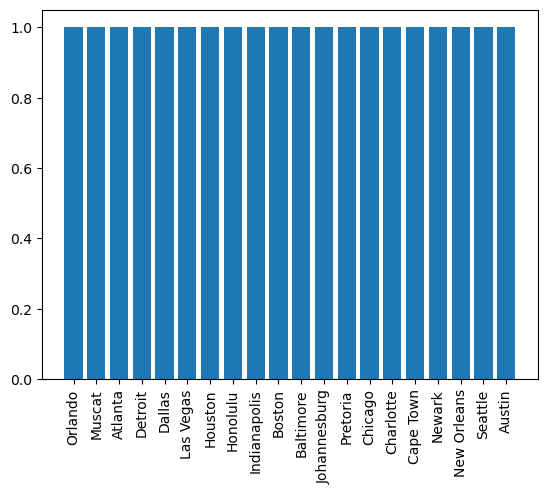

<Figure size 3000x900 with 0 Axes>

In [88]:
clust3 = main2_df[main2_df['cluster']==3]
plt.bar(clust3['City'].value_counts().index,clust3['City'].value_counts())
plt.xticks(rotation=90)
plt.figure(figsize=(30,9))
plt.show()

From the above analysis we can see that based on the clusters London city is similar to Madrid.